## Importar os Módulos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image, clear_output
import time
import asyncio
import ipywidgets as widgets
import sys
from obspy.io.segy.segy import _read_segy
import cv2

sys.path.insert(0,'..') 

from _utils.segy.segy_reader import SegyReader

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Route Paths and Filenames

In [3]:
dataset_path = None
classification_path = None
df_export = None
df = None

text = widgets.Text(layout=widgets.Layout(width='100%'))
style = {'description_width': 'initial'}
examples = widgets.IntText(
    layout=widgets.Layout(width='50%'),
    style=style,
    value=100,
    description='Maximun examples (set to 0 to label the whole data):',
    disabled=False
)

def handle(sender):
    global dataset_path, classification_path, df_export, df
    dataset_path = text.value
        
    print('Updating dataset path to "{}"'.format(dataset_path))
    
    try:
        files = [x for x in os.listdir(dataset_path) if x.endswith(('.sgy','.png','.jpg'))]
        df_export = pd.DataFrame(files, columns = ['filename'])
        df_export['class'] = None
    except FileNotFoundError:
        print('Invalid path!')
        return
    
    print('\nCollected files:')
    for f in df_export.filename:
        print('\t', f)
    
    print('Total:', len(df_export))
    
    try:
        df = pd.read_csv(classification_path, delimiter=',', header=None)
        df.columns = ['filename','class']
    except:
        df = pd.DataFrame([], columns = ['filename','class'])
    df_export['class'] = df[df.filename.isin(df_export.filename.values)]['class']
    
    try:
        df = pd.read_csv(classification_path, delimiter=',', header=None)
        df.columns = ['filename','class']
    except:
        df = pd.DataFrame([], columns = ['filename','class'])
    df_export['class'] = df[df.filename.isin(df_export.filename.values)]['class']
    
button = widgets.Button(description='OK')
button.on_click(handle)

In [4]:
print('Dataset Path:')
display(text)
# print('Classification Path:')
display(examples)
display(button)

Dataset Path:


Text(value='', layout=Layout(width='100%'))

IntText(value=100, description='Maximun examples (set to 0 to label the whole data):', layout=Layout(width='50…

Button(description='OK', style=ButtonStyle())

Updating dataset path to "/Users/Betine/Programacao/6_python/MachineLearning/geoml/temp/dataset/FIGURAS_ML_PUC_2019_Ia"

Collected files:
	 sismoMod_Exp_0910.png
	 sismoMod_Exp_0904.png
	 sismoMod_Exp_0092.png
	 sismoMod_Exp_0938.png
	 sismoMod_Exp_0086.png
	 sismoMod_Exp_0079.png
	 sismoMod_Exp_0051.png
	 sismoMod_Exp_0737.png
	 sismoMod_Exp_0723.png
	 sismoMod_Exp_0045.png
	 sismoMod_Exp_0290.png
	 sismoMod_Exp_0284.png
	 sismoMod_Exp_0509.png
	 sismoMod_Exp_1171.png
	 sismoMod_Exp_1165.png
	 sismoMod_Exp_0535.png
	 sismoMod_Exp_0253.png
	 sismoMod_Exp_0247.png
	 sismoMod_Exp_1159.png
	 sismoMod_Exp_0521.png
	 sismoMod_Exp_0482.png
	 sismoMod_Exp_0496.png
	 sismoMod_Exp_1005.png
	 sismoMod_Exp_1011.png
	 sismoMod_Exp_0469.png
	 sismoMod_Exp_0441.png
	 sismoMod_Exp_1039.png
	 sismoMod_Exp_0327.png
	 sismoMod_Exp_0333.png
	 sismoMod_Exp_0455.png
	 sismoMod_Exp_0864.png
	 sismoMod_Exp_0870.png
	 sismoMod_Exp_0680.png
	 sismoMod_Exp_0858.png
	 sismoMod_Exp_0694.png
	 sismoMod_Exp_0119.pn

	 sismoMod_Exp_1279.png
	 sismoMod_Exp_0173.png
	 sismoMod_Exp_0615.png
	 sismoMod_Exp_0172.png
	 sismoMod_Exp_0614.png
	 sismoMod_Exp_0600.png
	 sismoMod_Exp_1278.png
	 sismoMod_Exp_0166.png
	 sismoMod_Exp_1250.png
	 sismoMod_Exp_0628.png
	 sismoMod_Exp_1244.png
	 sismoMod_Exp_1293.png
	 sismoMod_Exp_0833.png
	 sismoMod_Exp_0827.png
	 sismoMod_Exp_0199.png
	 sismoMod_Exp_1287.png
	 sismoMod_Exp_0416.png
	 sismoMod_Exp_0370.png
	 sismoMod_Exp_0364.png
	 sismoMod_Exp_0402.png
	 sismoMod_Exp_1052.png
	 sismoMod_Exp_0358.png
	 sismoMod_Exp_1046.png
	 sismoMod_Exp_1091.png
	 sismoMod_Exp_1085.png
	 sismoMod_Exp_0562.png
	 sismoMod_Exp_0204.png
	 sismoMod_Exp_0210.png
	 sismoMod_Exp_0576.png
	 sismoMod_Exp_1126.png
	 sismoMod_Exp_0238.png
	 sismoMod_Exp_1132.png
	 sismoMod_Exp_0589.png
	 sismoMod_Exp_0006.png
	 sismoMod_Exp_0760.png
	 sismoMod_Exp_0774.png
	 sismoMod_Exp_0012.png
	 sismoMod_Exp_0984.png
	 sismoMod_Exp_0990.png
	 sismoMod_Exp_0748.png
	 sismoMod_Exp_0947.png
	 sismoMod_Exp_0

Mapped : 8/100


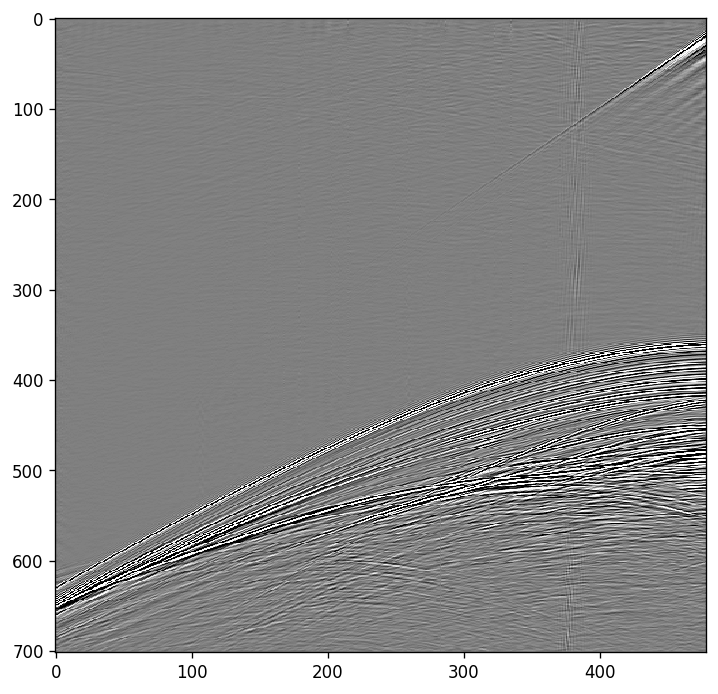

In [5]:
def wait_for_change(widget1, widget2, widget3):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget1.on_click(getvalue, remove=True)
        widget2.on_click(getvalue, remove=True)
        widget3.on_click(getvalue, remove=True)
         
    widget1.on_click(getvalue)
    widget2.on_click(getvalue)
    widget3.on_click(getvalue)
    return future

button1=widgets.Button(description="good")
button2=widgets.Button(description="bad")
button3=widgets.Button(description="ugly")

list_to_tag = None

async def f():
    global df_export
    maximun = examples.value
    if maximun == 0: maximun = 10000000
    mapped = 0
    for i in list_to_tag:
        if mapped < maximun:
            plt.figure(num=None, figsize=(7, 7), dpi=120, facecolor='w', edgecolor='k')
            img_path = dataset_path + '/' + i[1]['filename']
            segy = SegyReader()
            if img_path.endswith(('.sgy')):
                img, _ = segy.load_img(img_path, None)
                img = np.squeeze(img)
            else:
                img = cv2.imread(img_path)
                
            plt.imshow(img, cmap="gray", aspect='auto')
            plt.show()
            display(widgets.HBox([button1, button2, button3]))
            
            x = await wait_for_change(button1, button2, button3)

            clear_output()

            df_export.loc[i[0], 'class'] = x
            mapped += 1
            print(f'Mapped : {mapped}/{min(maximun,df_export.shape[0])}')

    save = widgets.Button(description='Save')
    
    def h(x):
        df_export.to_csv(dataset_path + '/' + 'labels.csv', header=None, index=None)
        print('File saved as', dataset_path + '/' + 'labels.csv')
    
    save.on_click(h)
    display(save)
        
loop = asyncio.get_event_loop()

start = widgets.Button(description='Start Labelling')

def sart_handle(sender):
    global list_to_tag, examples_number
    list_to_tag = df_export.iterrows()
    loop.create_task(f())

start.on_click(sart_handle)
display(start)